In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import *
from preprocess import *
from skimage import filters
from random import choice
from scipy import signal
from skimage.color import gray2rgb
import matplotlib as mpl

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.markeredgecolor'] = 'k'

# Metodologia

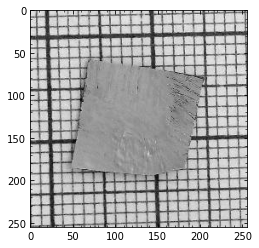

In [2]:
filename = choice(list(os.listdir('dataset/images')))
image = np.array(open_image(os.path.join('dataset/images', filename)))
I = rgb2gray(image)
plt.imshow(I, cmap='gray')

## Derivada direcional

* $\mathcal{I}(i, j)$: tom de cinza no ponto $(i, j)$ da imagem
* $\nabla_iI(i, j)$: tom de cinza no ponto $(i, j)$ da derivada na direção $\hat{i}$
* $\nabla_jI(i, j)$: tom de cinza no ponto $(i, j)$ da derivada na direção $\hat{j}$
* $\mathcal{F}$: transformada discreta de fourier

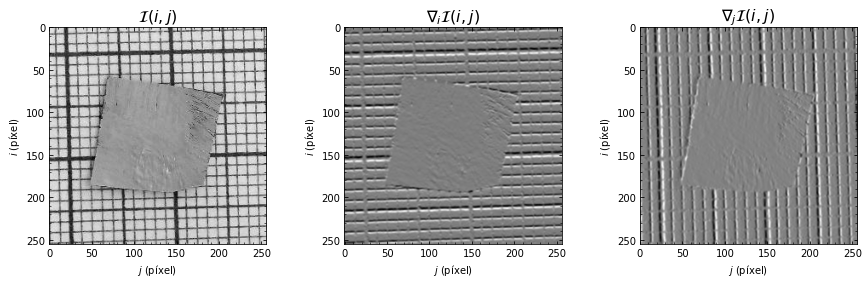

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
#fig.subplots_adjust(wspace=0)
for ax in axs.flat: 
    ax.set_xlabel(r'$j$ (píxel)')
    ax.set_ylabel(r'$i$ (píxel)')

D_j = filters.farid_v(I)
D_i = filters.farid_h(I).T

axs[0].imshow(I, cmap='gray')
axs[1].imshow(D_i.T, cmap='gray')
axs[2].imshow(D_j, cmap='gray')

axs[0].set_title(r'$\mathcal{I}(i, j)$', size=16)
axs[1].set_title(r'$\nabla_i\mathcal{I}(i, j)$', size=16)
axs[2].set_title(r'$\nabla_j\mathcal{I}(i, j)$', size=16)
plt.show()

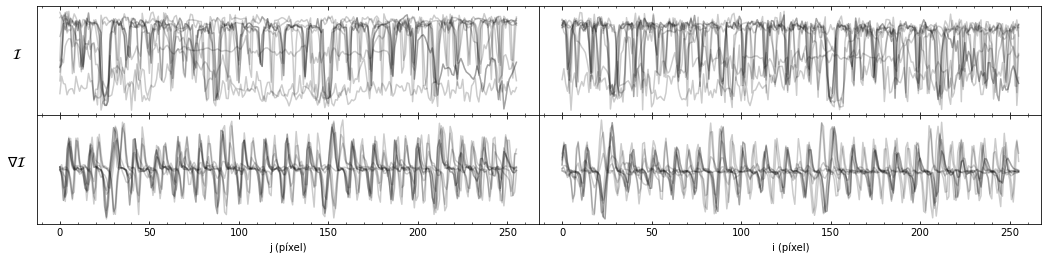

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(18, 4))
fig.subplots_adjust(hspace=0, wspace=0)
for ax in axs.flat: ax.set_yticks([])

for i in np.random.randint(0, len(I), 10):
    axs[0][0].plot(I[i], 'k-', alpha=0.2)
    axs[0][1].plot(I.T[i], 'k-', alpha=0.2)
    axs[1][0].plot(D_i[i], 'k-', alpha=0.2)
    axs[1][1].plot(D_j[i], 'k-', alpha=0.2)
    
axs[0][0].set_ylabel(r'$\mathcal{I}$', size=14, rotation=0, labelpad=20)
axs[1][0].set_xlabel(r'j (píxel)')
axs[1][1].set_xlabel(r'i (píxel)')
axs[1][0].set_ylabel(r'$\nabla\mathcal{I}$', size=14, rotation=0, labelpad=20)

plt.show()

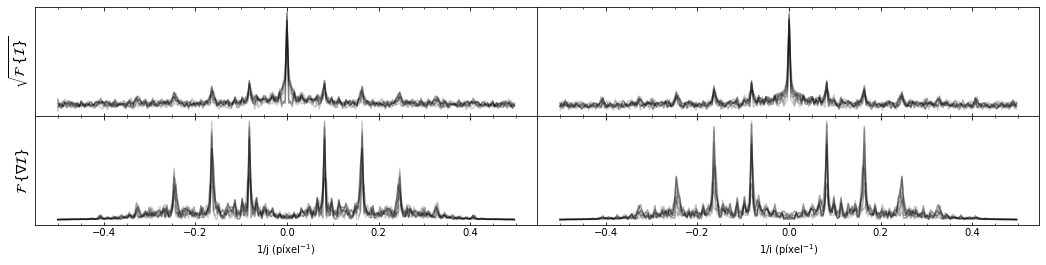

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(18, 4))
fig.subplots_adjust(hspace=0, wspace=0)
for ax in axs.flat: ax.set_yticks([])

freq = np.fft.fftshift(np.fft.fftfreq(256, 1))
fourier = lambda x:np.abs(np.fft.fftshift(np.fft.fft(x)))

for i in np.random.randint(0, len(I), 10):
    axs[0][0].plot(freq, fourier(I[i])**0.5, 'k-', alpha=0.2)
    axs[0][1].plot(freq, fourier(I.T[i])**0.5, 'k-', alpha=0.2)
    axs[1][0].plot(freq, fourier(D_i[i]), 'k-', alpha=0.2)
    axs[1][1].plot(freq, fourier(D_j[i]), 'k-', alpha=0.2)
    
axs[1][0].set_xlabel(r'1/j (píxel$^{-1}$)')
axs[1][1].set_xlabel(r'1/i (píxel$^{-1}$)')
axs[0][0].set_ylabel(r'$\sqrt{\mathcal{F}\,\{\mathcal{I}\}}$', size=14)
axs[1][0].set_ylabel(r'$\mathcal{F}\,\{\nabla\mathcal{I}\}$', size=14)
plt.show()

## Autocorrelação

$$C_{xy}(\tau) = \sum_{t = -N}^N x(t)y(t + \tau)$$

$$
\begin{align}
    C_i(\tau, j) = \sum_{t = -N}^N \nabla_iI(t, j)\cdot\nabla_iI(t + \tau, j) &&
    C_j(\tau, i) = \sum_{t = -N}^N \nabla_jI(i, \tau)\cdot\nabla_jI(i, t + \tau)
\end{align}
$$

In [6]:
def autocorr(x, mode='full'):
    return np.correlate(x, x, mode=mode)

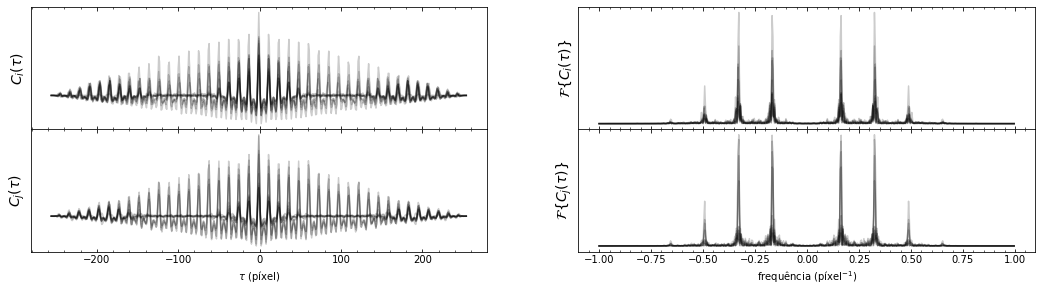

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(18, 4.5))
fig.subplots_adjust(hspace=0)
for ax in axs.flat: ax.set_yticks([])

freq = np.fft.fftshift(np.fft.fftfreq(256*2, 0.5)[:-1])

tau = np.arange(-256, 255)
for i in np.random.randint(0, len(I), 10):
    Ci = autocorr(D_i[i])
    Cj = autocorr(D_j[i])
    axs[0][0].plot(tau, Ci, 'k-', alpha=0.2)
    axs[1][0].plot(tau, Cj, 'k-', alpha=0.2)
    axs[0][1].plot(freq, fourier(Ci), 'k-', alpha=0.2)
    axs[1][1].plot(freq, fourier(Cj), 'k-', alpha=0.2)

axs[1][0].set_xlabel(r'$\tau$ (píxel)')
axs[1][1].set_xlabel(r'frequência (píxel$^{-1}$)')

axs[0][0].set_ylabel(r'$C_i(\tau)$', size=14)
axs[1][0].set_ylabel(r'$C_j(\tau)$', size=14)
axs[0][1].set_ylabel(r'$\mathcal{F}\{C_i(\tau)\}$', size=14)
axs[1][1].set_ylabel(r'$\mathcal{F}\{C_j(\tau)\}$', size=14)

plt.show()

## Determinação da escala via PSD

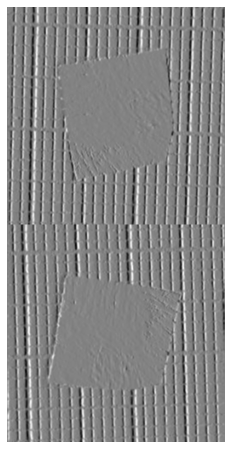

In [8]:
plt.figure(figsize=(4, 8))
far = np.concatenate([D_i, D_j])
plt.imshow(far, cmap='gray')
plt.axis('off')
plt.show()

[0.08203125 0.1640625 ]


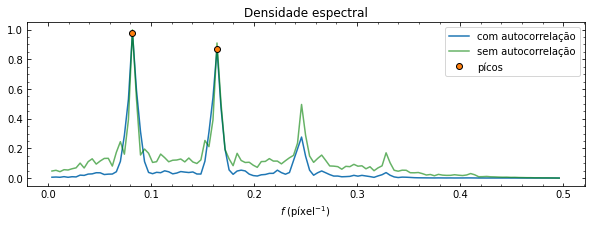

In [10]:
fig, ax = plt.subplots(figsize=(10, 3))

freq = np.fft.fftfreq(256, 1)
loc = (freq > 0)

fft = lambda x: norm(np.abs(np.fft.fft(x))[loc])
auto_fft = lambda x: norm(np.abs(np.fft.fft(autocorr(x, 'same')))[loc])

M = np.random.randint(0, len(I), 20)
Y = np.apply_along_axis(auto_fft, 0, far[M].T).mean(axis=1)

ax.plot(freq[loc], Y, label='com autocorrelação')
ax.plot(freq[loc], np.apply_along_axis(fft, 0, far[M].T).mean(axis=1), 'g-', alpha=0.6, label='sem autocorrelação')

P = find_peaks(Y, prominence=0.5)[0]
F = freq[loc][P]
ax.plot(F, Y[P], 'o', label='pícos')
ax.legend()
ax.set_xlabel(r'$f$ (píxel$^{-1}$)')
ax.set_title('Densidade espectral')

print(F)

plt.show()

# Testes

In [19]:
def find_scale(img): # método otimizado
    freq = np.fft.fftfreq(len(img), 1)
    loc = (freq > 0)
    auto_fft = lambda x: norm(np.abs(np.fft.fft(autocorr(x, 'same')))[loc])
    far = np.concatenate([filters.farid_v(img), filters.farid_h(img).T])
    Y = np.apply_along_axis(auto_fft, 0, far.T).mean(axis=1)
    P = find_peaks(Y, height=0.5)[0]
    return freq[loc][P].min()

In [14]:
info = get_info()

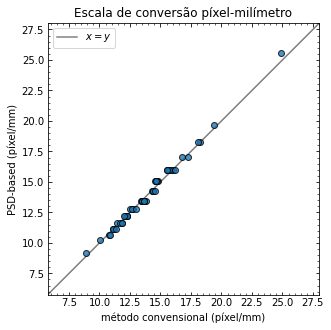

In [17]:
_, ax = plt.subplots(figsize=(5, 5))

x = np.sqrt(info.label_pixel_area/info.area).values
y = 1/info.f
plt.plot(x, y, 'o', zorder=2, alpha=0.8)

t = np.linspace(x.min()-x.ptp()*0.25, x.max()+x.ptp()*0.25)
plt.plot(t, t, c='k', label=r'$x=y$', zorder=0, alpha=0.5)

plt.xlabel('método convensional (píxel/mm)')
plt.ylabel('PSD-based (píxel/mm)')
ax.set_aspect('equal')
plt.legend()
plt.xlim(x.min()-x.ptp()*0.2, x.max()+x.ptp()*0.2)
plt.ylim(x.min()-x.ptp()*0.2, x.max()+x.ptp()*0.2)
plt.title('Escala de conversão píxel-milímetro')

plt.show()

In [18]:
(np.abs(x-y)/y*100).describe()

count    54.000000
mean      1.361432
std       0.894361
min       0.028074
25%       0.578901
50%       1.228907
75%       1.936599
max       3.131876
Name: f, dtype: float64

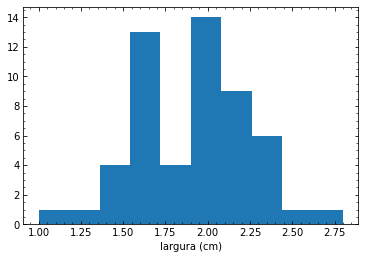

In [25]:
plt.hist(256/y * 0.1)
plt.xlabel('largura (cm)')
plt.show()

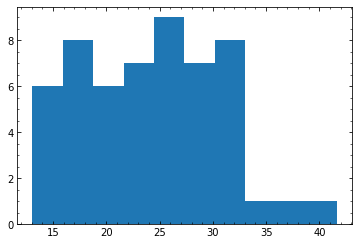

In [27]:
plt.hist(info.label_pixel_area/256**2 * 100)
plt.show()

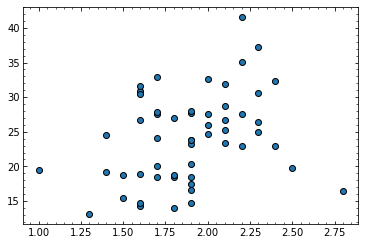

In [29]:
plt.plot(256/y * 0.1, info.label_pixel_area/256**2 * 100, 'o')

# Referência

* Signal Processing and Machine Learning with Applications